### Задание 1

Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.

|    День     | Улица | Гараж |
| :---------: | :---: | :---: |
| Понедельник |  80   |  100  |
|   Вторник   |  98   |  82   |
|    Среда    |  75   |  105  |
|   Четверг   |  91   |  89   |
|   Пятница   |  78   |  102  |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as sts
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

1.1. Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).


In [3]:
np.corrcoef(street, garage)[0, 1]

# Value close to -1 => strong negative correlation

-0.9999999999999998

1.2. Построить диаграмму рассеяния для вышеупомянутых переменных.


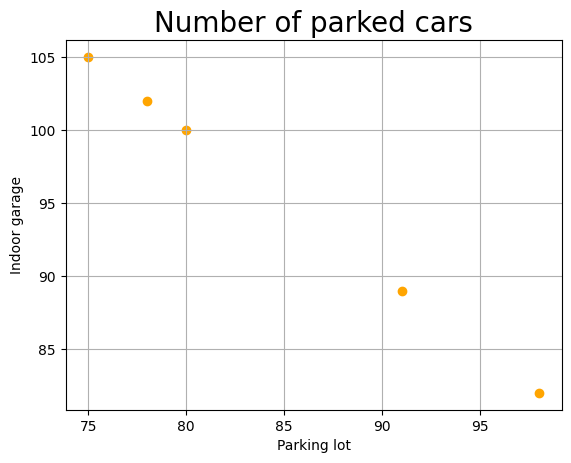

In [4]:
plt.grid(True)
plt.title("Number of parked cars", fontsize=20)
plt.xlabel("Parking lot")
plt.ylabel("Indoor garage")
plt.scatter(street, garage, color="orange")
plt.show()

### Задание 2

Найти и выгрузить данные. Вывести, провести предобработку и описать признаки.


In [5]:
data = pd.read_csv('data/WHR_2023.csv')
data.head(10)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
5,Sweden,Western Europe,7.395,1.921,1.510,0.562,0.754,0.225,0.520
6,Norway,Western Europe,7.315,1.994,1.521,0.544,0.752,0.212,0.463
7,Switzerland,Western Europe,7.240,2.022,1.463,0.582,0.678,0.151,0.475
8,Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418
9,New Zealand,North America and ANZ,7.123,1.842,1.544,0.513,0.672,0.230,0.471


In [6]:
data.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


In [7]:
data = data.dropna(axis=0)
data.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

2.1. Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.


In [8]:
data_mcv = pd.DataFrame(data, columns=[
    'happiness_score',
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'perceptions_of_corruption'
])

data_mcv.corr().style.background_gradient(cmap='coolwarm')

# Most correlating variable is 'happiness_score'

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption
happiness_score,1.000000,0.783811,0.838161,0.746699,0.661944,0.470568
gdp_per_capita,0.783811,1.000000,0.741715,0.837518,0.449433,0.435398
social_support,0.838161,0.741715,1.000000,0.725334,0.546545,0.275316
healthy_life_expectancy,0.746699,0.837518,0.725334,1.000000,0.414965,0.404417
freedom_to_make_life_choices,0.661944,0.449433,0.546545,0.414965,1.000000,0.381367
perceptions_of_corruption,0.470568,0.435398,0.275316,0.404417,0.381367,1.000000


In [9]:
data_mcv.corr()['happiness_score'].to_frame().style.background_gradient(cmap='coolwarm')

# Most correlating pair is 'happiness_score' and 'social_support'

,happiness_score
happiness_score,1.000000
gdp_per_capita,0.783811
social_support,0.838161
healthy_life_expectancy,0.746699
freedom_to_make_life_choices,0.661944
perceptions_of_corruption,0.470568


2.2. Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.


In [10]:
model = LinearRegression()
x = data_mcv[['social_support']]
y = data_mcv['happiness_score']

model.fit(x, y)
k = model.coef_[0]
b = model.intercept_

model_y = k * x + b
mse = mean_squared_error(model_y, y)

print(
    f'Angle: {k}\n'
    f'Offset: {b}\n'
    f'Regression: {k.round(2)}x + {b.round(2)}\n'
    f'MSE: {mse.round(2)}\n'
)

# Happiness score (0-10) increases by ~2.93 points
# for every social support score point (0-2?)
# MSE of 0.39 indicates pretty accurate results

Angle: 2.926956215844794
Offset: 2.1635484863272767
Regression: 2.93x + 2.16
MSE: 0.39



2.3. Визуализировать регрессию на графике.


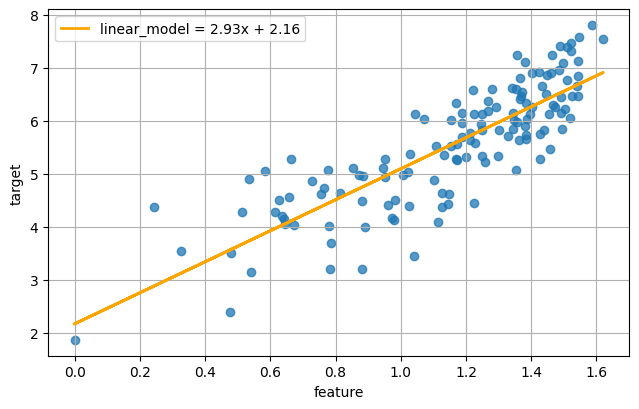

In [11]:
fig = plt.figure(figsize = (7.5, 4.5))
plt.plot(x, model_y, linewidth=2, color='orange', label=f'linear_model = {k:.2f}x + {b:.2f}')
plt.scatter(x, y, alpha = 0.75)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.show()


### Задание 3

Загрузить данные из файла `insurance.csv`. Вывести и провести предобработку. Вывести список уникальных регионов.


In [12]:
insurance = pd.read_csv("data/insurance.csv")
insurance.head(11)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [13]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
print(insurance.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


3.1. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.


In [15]:
regions = np.array(insurance.region)
regions_uniq = insurance.region.unique()
bmi = np.array(insurance.bmi)
frame = pd.DataFrame({"region": regions, "bmi": bmi})
grouped_data = frame.groupby("region").groups
region_data = [bmi[grouped_data[region]] for region in regions_uniq]
result = sts.f_oneway(*region_data)
print("Test statistic (F-value):", result.statistic)
print("P-value:", result.pvalue)

# P-value < 0.05 => Statistically significant effect

Test statistic (F-value): 39.49505720170283
P-value: 1.881838913929143e-24


3.2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.


In [16]:
model = ols("bmi ~ region", data=insurance).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

# Identical result

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


3.3. С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.


In [17]:
region_pairs = []

for region1 in range(3):
    for region2 in range(region1 + 1, 4):
        region_pairs.append((regions_uniq[region1], regions_uniq[region2]))

q = 0.05 / len(region_pairs)
print(f'Bonferroni correction (q) = {q}')

for reg1, reg2 in region_pairs:
    print(f'\nPair: {reg1} and {reg2}')
    tt = sts.ttest_ind(bmi[grouped_data[reg1]], bmi[grouped_data[reg2]])
    print(f'F = {tt.statistic}, p = {tt.pvalue}')
    print('Hypothesis true') if (tt.pvalue > q) else print('Hypothesis false')
    
# NW and NE regions have similar BMI data

Bonferroni correction (q) = 0.008333333333333333

Pair: southwest and southeast
F = -5.908373821545118, p = 5.4374009639680636e-09
Hypothesis false

Pair: southwest and northwest
F = 3.2844171500398582, p = 0.001076958496307695
Hypothesis false

Pair: southwest and northeast
F = 3.1169000930045923, p = 0.0019086161671573074
Hypothesis false

Pair: southeast and northwest
F = 9.25649013552548, p = 2.643571405230106e-19
Hypothesis false

Pair: southeast and northeast
F = 8.790905562598699, p = 1.186014937424813e-17
Hypothesis false

Pair: northwest and northeast
F = 0.060307727183293185, p = 0.951929170821864
Hypothesis true


3.4. Выполнить пост-хок тесты Тьюки и построить график.


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


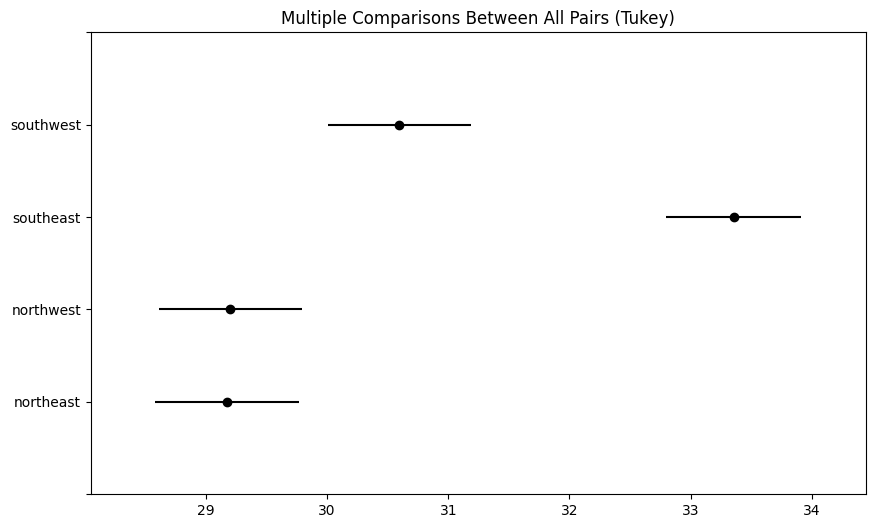

In [18]:
tukey = pairwise_tukeyhsd(endog = bmi, groups = regions, alpha = 0.05)
tukey.plot_simultaneous()
# plt.vlines(x = 29.77, ymin = -0.5, ymax = 3.5, color = 'orange')
tukey.summary()

3.5. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.


In [19]:
region = np.array(insurance.region)
sex = np.array(insurance.sex)
bmi = np.array(insurance.bmi)
frame_rsbmi = pd.DataFrame({'sex': sex, 'region': region, 'bmi': bmi})
frame_rsbmi.head(11)
model = ols('bmi ~ C(sex) + C(region) + C(sex):C(region)', data = frame_rsbmi).fit()
sm.stats.anova_lm(model, typ = 2)

# TODO
# Sex doesn't have statistically significant effect on BMI
# Region has statistically significant effect on BMI

,sum_sq,df,F,PR(>F)
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex):C(region),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


3.6. Выполнить пост-хок тесты Тьюки и построить график.


group1,group2,meandiff,p-adj,lower,upper,reject
female/northeast,female/northwest,-0.0464,1.0,-2.0142,1.9215,False
female/northeast,female/southeast,3.3469,0.0,1.41,5.2839,True
female/northeast,female/southwest,0.7362,0.9497,-1.2377,2.71,False
female/northeast,male/northeast,-0.2998,0.9998,-2.2706,1.6711,False
female/northeast,male/northwest,-0.2042,1.0,-2.1811,1.7728,False
female/northeast,male/southeast,4.6657,0.0,2.7634,6.568,True
female/northeast,male/southwest,1.8051,0.1007,-0.1657,3.776,False
female/northwest,female/southeast,3.3933,0.0,1.4656,5.321,True
female/northwest,female/southwest,0.7825,0.9294,-1.1822,2.7473,False
female/northwest,male/northeast,-0.2534,0.9999,-2.2152,1.7083,False


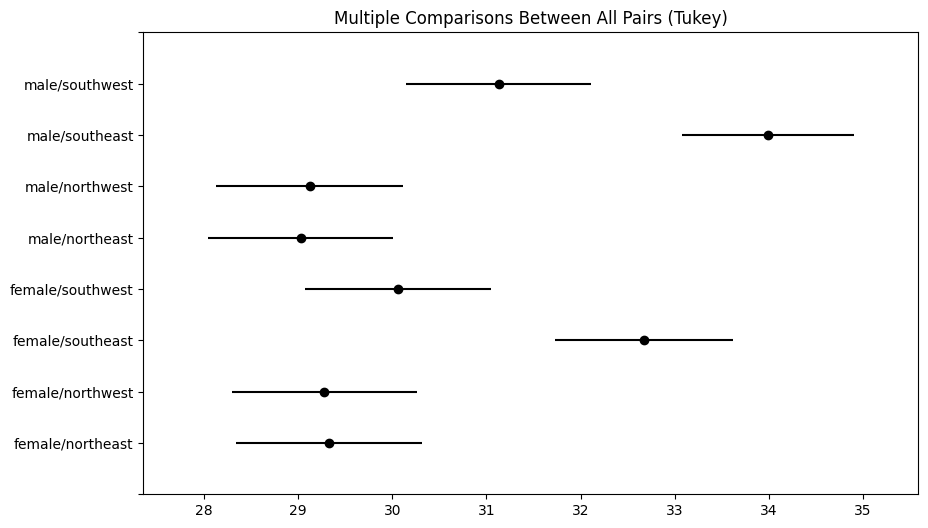

In [20]:
frame_rsbmi['combination'] = frame_rsbmi['sex'] + '/' + frame_rsbmi['region']
tukey = pairwise_tukeyhsd(endog = frame_rsbmi['bmi'], groups = frame_rsbmi['combination'])
tukey.plot_simultaneous()
tukey.summary()